In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
print('Numpy Version :',np.__version__)
print('Pandas Version :',pd.__version__)
print('Matplotlib :', matplotlib.__version__)
print('Seaborn :',sns.__version__)

Numpy Version : 1.26.4
Pandas Version : 2.1.4
Matplotlib : 3.8.0
Seaborn : 0.12.2


In [3]:
# Importing the data

In [4]:
df = pd.read_excel("Customer Churn Data.xlsx", sheet_name="Data for DSBA")

In [5]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [6]:
df.shape

(11260, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [9]:
# Dropping unwanted columns

In [10]:
df.drop(['AccountID'], axis=1, inplace=True)

In [11]:
#Column renaming

In [12]:
df.rename(columns={'account_segment':'Account_segment'
                   ,'rev_per_month':'Rev_per_month'
                   ,'rev_growth_yoy':'Rev_growth_yoy'
                   ,'coupon_used_for_payment':'Coupon_used_for_payment'
                   ,'cashback':'Cashback'}, inplace=True)

In [13]:
# Checking Unique values

In [14]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column,': ')
        print(df[column].unique())
        print('\n')
    

Tenure : 
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]


Payment : 
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


Gender : 
['Female' 'Male' 'F' nan 'M']


Account_user_count : 
[3 4 nan 5 2 '@' 1 6]


Account_segment : 
['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']


Marital_Status : 
['Single' 'Divorced' 'Married' nan]


Rev_per_month : 
[9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 140 133 129 107 118 11 105 20 119 121 137 110 22 101
 136 125 14 13 12 115 23 122 117 131 104 15 25 135 111 109 100 103]


Rev_growth_yoy : 
[11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26 '$' 4 27 28]


Coupon_used_for_payment : 
[1 0 4 2 9 6 11 7 12 10 5 3 13 15 8 '#' '$' 14 '*' 16]


Day_Since_CC_connect : 
[5 0 3 7 2 1 8 6 4 15 nan 11 10 9 13 12 17 16 14 30 '$' 46 18 31 47]


Cashback : 
[159.93 120.9 nan ... 227.36 226.91 191.42

In [15]:

df['Rev_per_month'].replace(to_replace='+', value=np.nan, inplace=True)
df['Rev_growth_yoy'].replace(to_replace='$', value=np.nan, inplace=True)
df['Day_Since_CC_connect'].replace(to_replace='$', value=np.nan, inplace=True)
df['Coupon_used_for_payment'].replace(to_replace='$', value=np.nan, inplace=True)
df['Coupon_used_for_payment'].replace(to_replace='#', value=np.nan, inplace=True)
df['Coupon_used_for_payment'].replace(to_replace='*', value=np.nan, inplace=True)
df['Cashback'].replace(to_replace='$', value=np.nan, inplace=True)
df['Login_device'].replace(to_replace='&&&&', value=df['Login_device'].mode()[0], inplace=True)
df['Tenure'].replace(to_replace='#', value=np.nan, inplace=True)
df['Gender'].replace(to_replace='F', value='Female', inplace=True)
df['Gender'].replace(to_replace='M', value='Male', inplace=True)
df['Account_user_count'].replace(to_replace='@', value=df['Account_user_count'].mode()[0], inplace=True)
df['Account_segment'].replace(to_replace='Regular +', value='Regular Plus', inplace=True)
df['Account_segment'].replace(to_replace='Super +', value='Super Plus', inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  float64
 8   Account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  Rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  Rev_growth_yoy           11257 non-null  float64
 14  Coupon_used_for_paymen

In [17]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
Account_segment             97
CC_Agent_Score             116
Marital_Status             212
Rev_per_month              791
Complain_ly                357
Rev_growth_yoy               3
Coupon_used_for_payment      3
Day_Since_CC_connect       358
Cashback                   473
Login_device               221
dtype: int64

In [18]:
# Treating null values for object data type columns

In [19]:
for column in df.columns:
    mode_1 = df[column].mode()[0]
    if df[column].dtype== 'object':
        df[column].fillna(value=mode_1, inplace=True)
df.isnull().sum()
    
    

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                      0
Gender                       0
Service_Score               98
Account_user_count         112
Account_segment              0
CC_Agent_Score             116
Marital_Status               0
Rev_per_month              791
Complain_ly                357
Rev_growth_yoy               3
Coupon_used_for_payment      3
Day_Since_CC_connect       358
Cashback                   473
Login_device                 0
dtype: int64

In [20]:
# Treating null values for float data type columns

In [21]:
for column in df.columns:
    if df[column].dtype=='float64':
        df[column].fillna(df[column].median(), inplace=True)
df.isnull().sum()       

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
Account_segment            0
CC_Agent_Score             0
Marital_Status             0
Rev_per_month              0
Complain_ly                0
Rev_growth_yoy             0
Coupon_used_for_payment    0
Day_Since_CC_connect       0
Cashback                   0
Login_device               0
dtype: int64

In [22]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column,': ')
        print(df[column].unique())
        print('\n')

Payment : 
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']


Gender : 
['Female' 'Male']


Account_segment : 
['Super' 'Regular Plus' 'Regular' 'HNI' 'Super Plus']


Marital_Status : 
['Single' 'Divorced' 'Married']


Login_device : 
['Mobile' 'Computer']




In [23]:
#df.to_excel('new_output.xlsx')

In [24]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

In [25]:
#Encoding the features

In [26]:
df['Payment'] = np.where(df['Payment']=='Debit Card',1,df['Payment'])
df['Payment'] = np.where(df['Payment']=='UPI',2,df['Payment'])
df['Payment'] = np.where(df['Payment']=='Credit Card',3,df['Payment'])
df['Payment'] = np.where(df['Payment']=='Cash on Delivery',4,df['Payment'])
df['Payment'] = np.where(df['Payment']=='E wallet',5,df['Payment'])

In [27]:
df['Gender'] = np.where(df['Gender']=='Female',1,df['Gender'])
df['Gender'] = np.where(df['Gender']=='Male',2,df['Gender'])                       

In [28]:
df['Account_segment'] = np.where(df['Account_segment']=='Regular',1,df['Account_segment'])
df['Account_segment'] = np.where(df['Account_segment']=='Regular Plus',2,df['Account_segment'])
df['Account_segment'] = np.where(df['Account_segment']=='HNI',3,df['Account_segment'])
df['Account_segment'] = np.where(df['Account_segment']=='Super',4,df['Account_segment'])
df['Account_segment'] = np.where(df['Account_segment']=='Super Plus',5,df['Account_segment'])

In [29]:
df['Marital_Status'] = np.where(df['Marital_Status']=='Single',1,df['Marital_Status'])
df['Marital_Status'] = np.where(df['Marital_Status']=='Married',2,df['Marital_Status'])
df['Marital_Status'] = np.where(df['Marital_Status']=='Divorced',3,df['Marital_Status'])

In [30]:
df['Login_device'] = np.where(df['Login_device']=='Mobile',1,df['Login_device'])
df['Login_device'] = np.where(df['Login_device']=='Computer',2,df['Login_device'])

In [31]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,Account_segment,CC_Agent_Score,Marital_Status,Rev_per_month,Complain_ly,Rev_growth_yoy,Coupon_used_for_payment,Day_Since_CC_connect,Cashback,Login_device
0,1,4.0,3.0,6.0,1,1,3.0,3.0,4,2.0,1,9.0,1.0,11.0,1.0,5.0,159.93,1
1,1,0.0,1.0,8.0,2,2,3.0,4.0,2,3.0,1,7.0,1.0,15.0,0.0,0.0,120.90,1
2,1,0.0,1.0,30.0,1,2,2.0,4.0,2,3.0,1,6.0,1.0,14.0,0.0,3.0,165.25,1
3,1,0.0,3.0,15.0,1,2,2.0,4.0,4,5.0,1,8.0,0.0,23.0,0.0,3.0,134.07,1
4,1,0.0,1.0,12.0,3,2,2.0,3.0,2,5.0,1,3.0,0.0,11.0,1.0,3.0,129.60,1


In [32]:
#Splitting the data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop(['Churn'],axis=1)
y = df['Churn']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [37]:
LR_model = LogisticRegression()

In [38]:
LR_model.fit(X_train, y_train)

LogisticRegression()

In [39]:
ytrain_predict = LR_model.predict(X_train)
ytest_predict = LR_model.predict(X_test)

In [40]:
#Accuracy

In [41]:
LR_model.score(X_train, y_train)

0.8702106064450646

In [42]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [43]:
# AUC ROC for training data

AUC: 0.848


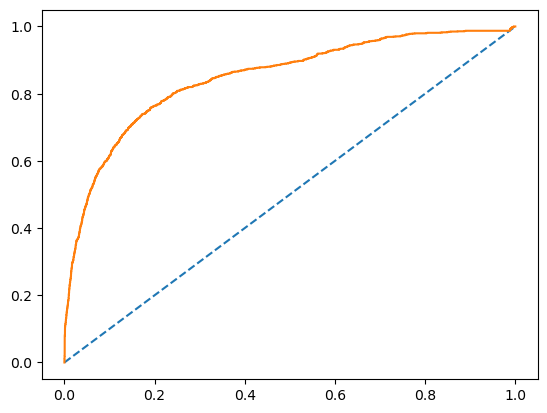

In [44]:
probs = LR_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [45]:
# Accuracy for test data
LR_model.score(X_test, y_test)

0.8730017761989343

In [46]:
## AUC ROC for test data

AUC: 0.839


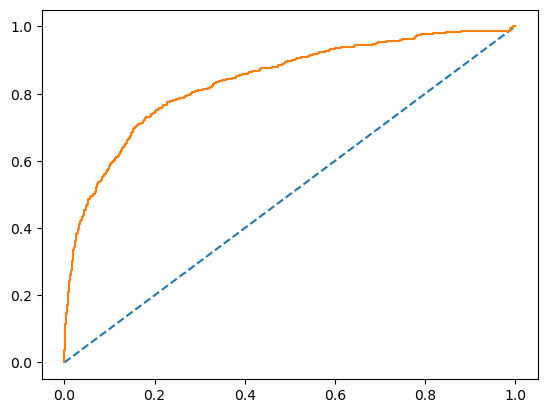

In [47]:
probs = LR_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

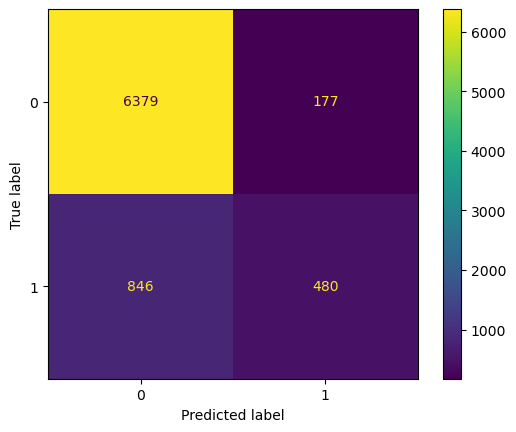

In [49]:
ConfusionMatrixDisplay.from_estimator(LR_model,X_train,y_train)

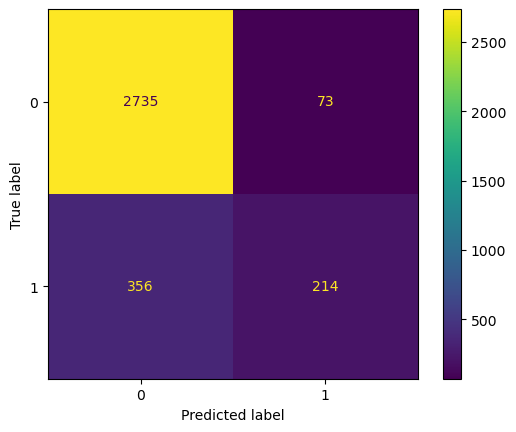

In [50]:
ConfusionMatrixDisplay.from_estimator(LR_model,X_test,y_test)

In [51]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      6556
           1       0.73      0.36      0.48      1326

    accuracy                           0.87      7882
   macro avg       0.81      0.67      0.70      7882
weighted avg       0.86      0.87      0.85      7882



In [52]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2808
           1       0.75      0.38      0.50       570

    accuracy                           0.87      3378
   macro avg       0.82      0.67      0.71      3378
weighted avg       0.86      0.87      0.86      3378



## Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [54]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [55]:
ytrain_predict = NB_model.predict(X_train)
ytest_predict = NB_model.predict(X_test)

In [56]:
#Accuracy on train data

In [57]:
NB_model.score(X_train, y_train)

0.8576503425526516

In [58]:
# AUC ROC for training data

AUC: 0.823


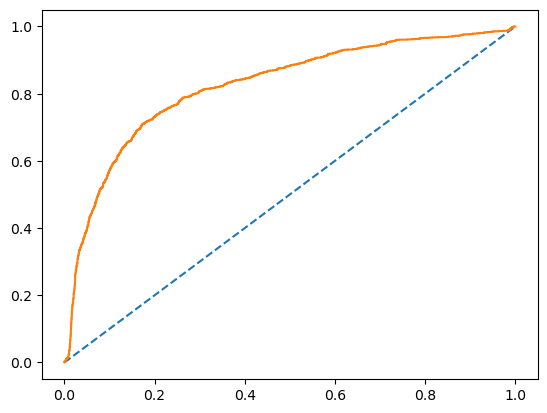

In [59]:
probs = NB_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [60]:
# Accuracy for test data
NB_model.score(X_test, y_test)

0.8582001184132623

In [61]:
## AUC ROC for test data

AUC: 0.815


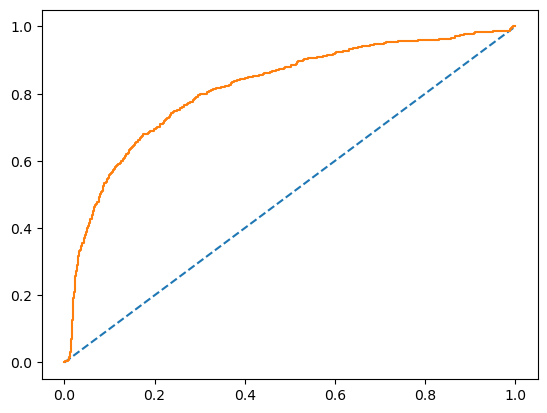

In [62]:
probs = NB_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

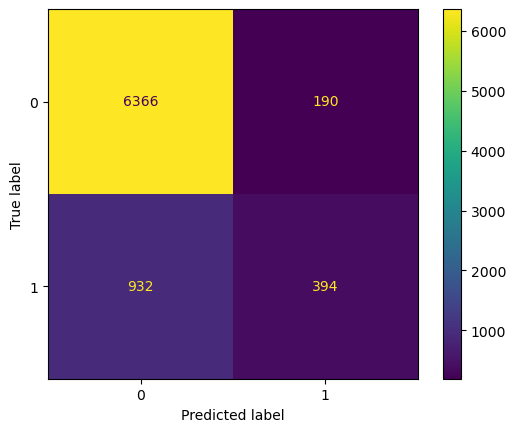

In [63]:
ConfusionMatrixDisplay.from_estimator(NB_model,X_train,y_train)

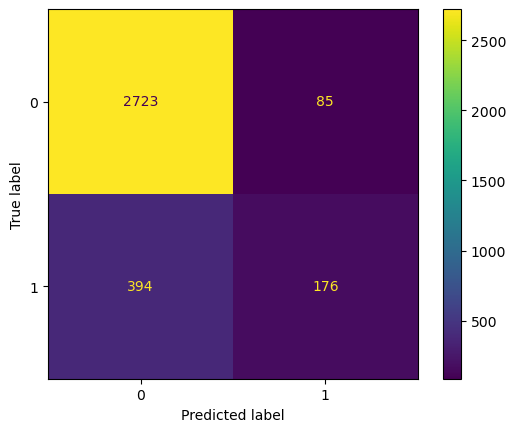

In [64]:
ConfusionMatrixDisplay.from_estimator(NB_model,X_test,y_test)

In [65]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6556
           1       0.67      0.30      0.41      1326

    accuracy                           0.86      7882
   macro avg       0.77      0.63      0.67      7882
weighted avg       0.84      0.86      0.83      7882



In [66]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2808
           1       0.67      0.31      0.42       570

    accuracy                           0.86      3378
   macro avg       0.77      0.64      0.67      3378
weighted avg       0.84      0.86      0.84      3378



## KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

In [70]:
# AUC ROC for training data

AUC: 0.964


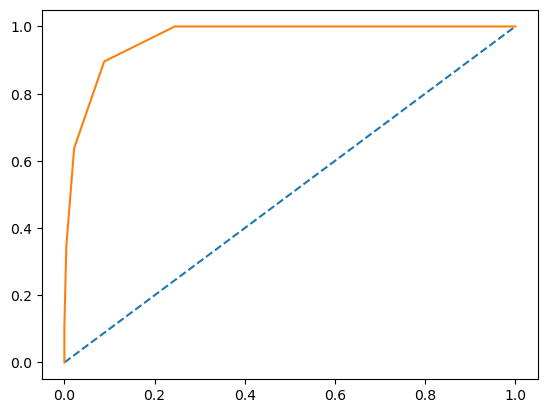

In [71]:
probs = KNN_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [72]:
## AUC ROC for test data

AUC: 0.885


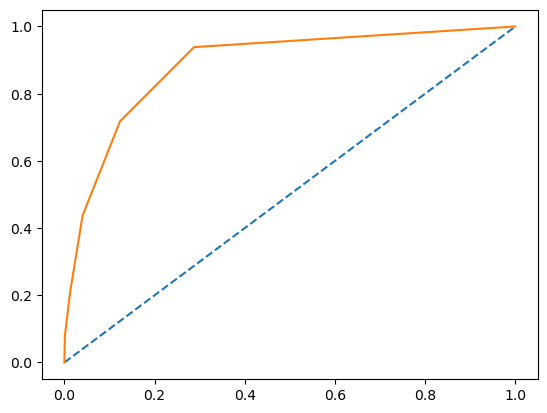

In [73]:
probs = KNN_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

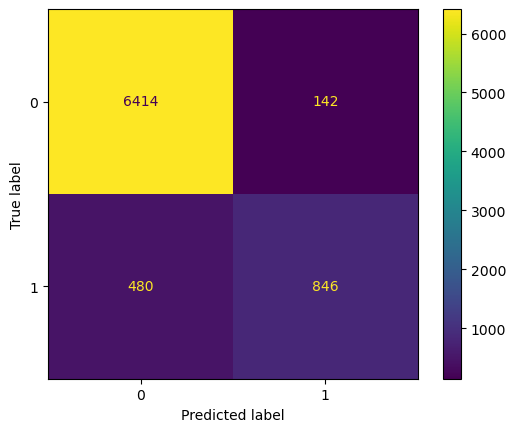

In [74]:
ConfusionMatrixDisplay.from_estimator(KNN_model,X_train,y_train)

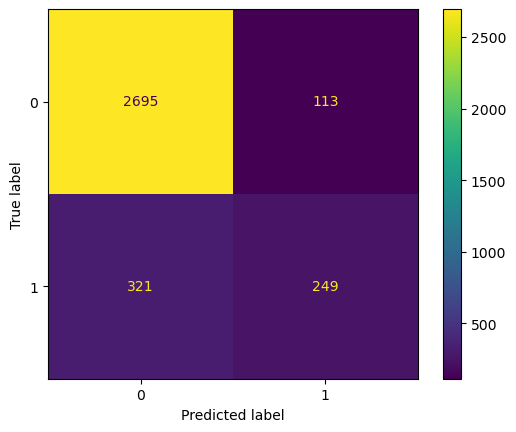

In [75]:
ConfusionMatrixDisplay.from_estimator(KNN_model,X_test,y_test)

In [76]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6556
           1       0.86      0.64      0.73      1326

    accuracy                           0.92      7882
   macro avg       0.89      0.81      0.84      7882
weighted avg       0.92      0.92      0.92      7882



In [77]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      2808
           1       0.69      0.44      0.53       570

    accuracy                           0.87      3378
   macro avg       0.79      0.70      0.73      3378
weighted avg       0.86      0.87      0.86      3378



## Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
DT_model= DecisionTreeClassifier()

In [80]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
ytrain_predict = DT_model.predict(X_train)
ytest_predict = DT_model.predict(X_test)

In [82]:
# AUC ROC for training data

AUC: 1.000


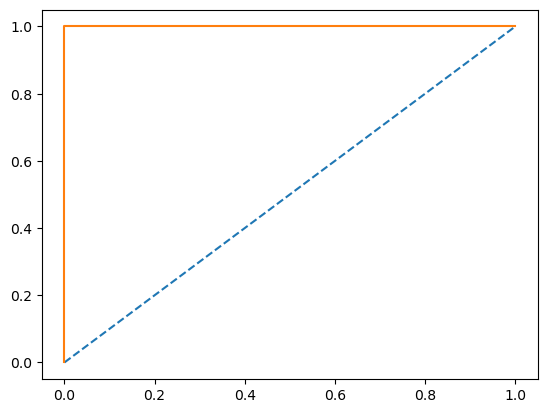

In [83]:
probs = DT_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [84]:
# AUC ROC for test data

AUC: 0.896


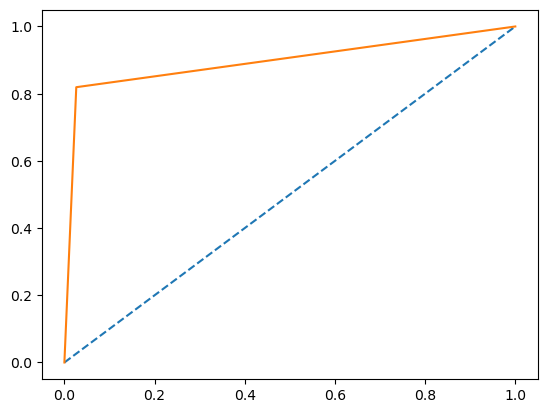

In [85]:
probs = DT_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

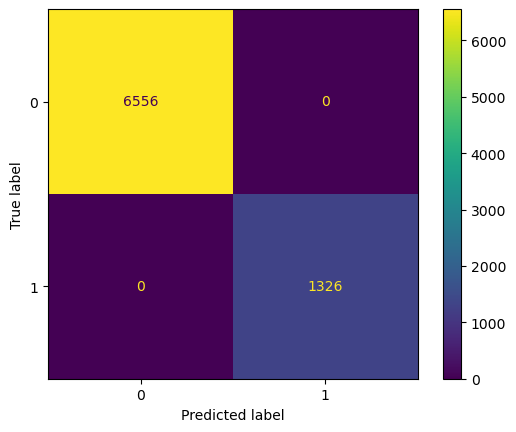

In [86]:
ConfusionMatrixDisplay.from_estimator(DT_model,X_train,y_train)

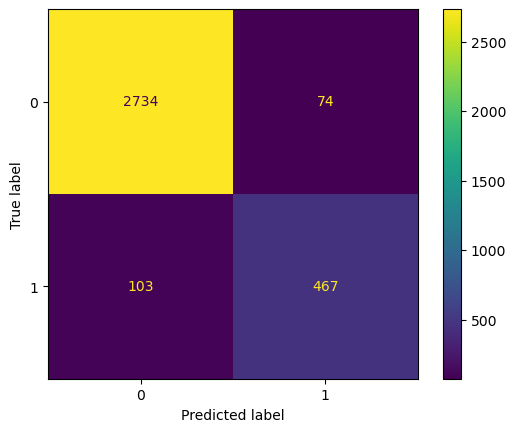

In [87]:
ConfusionMatrixDisplay.from_estimator(DT_model,X_test,y_test)

In [88]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [89]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2808
           1       0.86      0.82      0.84       570

    accuracy                           0.95      3378
   macro avg       0.91      0.90      0.90      3378
weighted avg       0.95      0.95      0.95      3378



## Linear Discriminant Analysis

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [91]:
LDR_model = LinearDiscriminantAnalysis()

In [92]:
LDR_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [93]:
ytrain_predict = LDR_model.predict(X_train)
ytest_predict = LDR_model.predict(X_test)

In [94]:
# AUC ROC for training data

AUC: 0.832


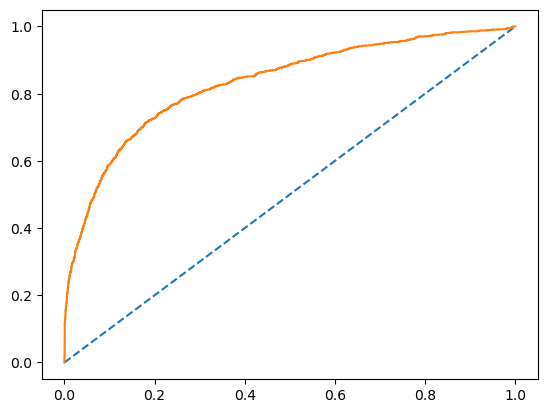

In [95]:
probs = LDR_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [96]:
# AUC ROC for test data

AUC: 0.824


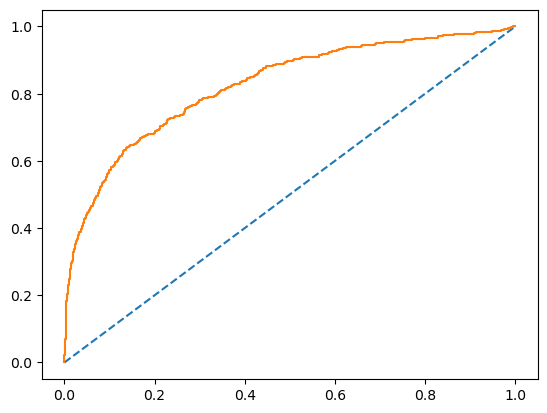

In [97]:
probs = LDR_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

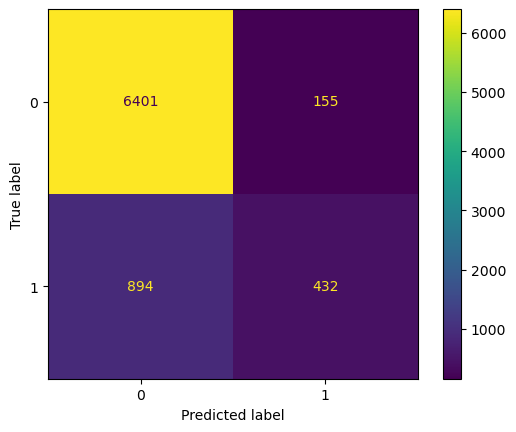

In [98]:
ConfusionMatrixDisplay.from_estimator(LDR_model,X_train,y_train)

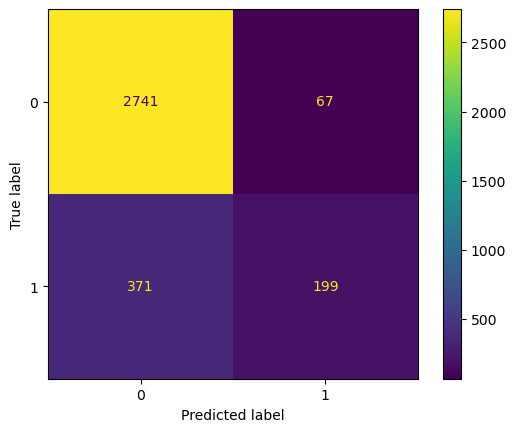

In [99]:
ConfusionMatrixDisplay.from_estimator(LDR_model,X_test,y_test)

In [100]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      6556
           1       0.74      0.33      0.45      1326

    accuracy                           0.87      7882
   macro avg       0.81      0.65      0.69      7882
weighted avg       0.85      0.87      0.84      7882



In [101]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2808
           1       0.75      0.35      0.48       570

    accuracy                           0.87      3378
   macro avg       0.81      0.66      0.70      3378
weighted avg       0.86      0.87      0.85      3378



# Ensemble Modeling

## Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [104]:
ytrain_predict = RF_model.predict(X_train)
ytest_predict = RF_model.predict(X_test)

In [105]:
# AUC ROC for training data

AUC: 1.000


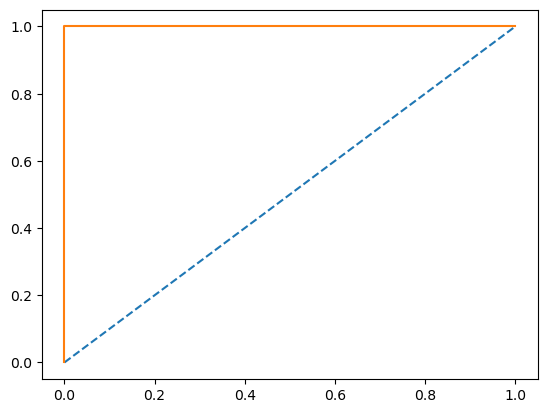

In [106]:
probs = RF_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [107]:
# AUC ROC for test data

AUC: 0.992


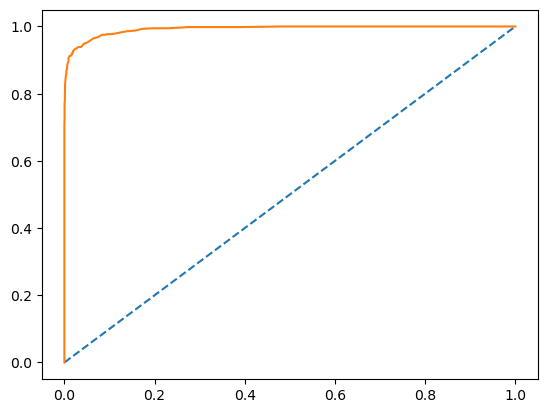

In [108]:
probs = RF_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

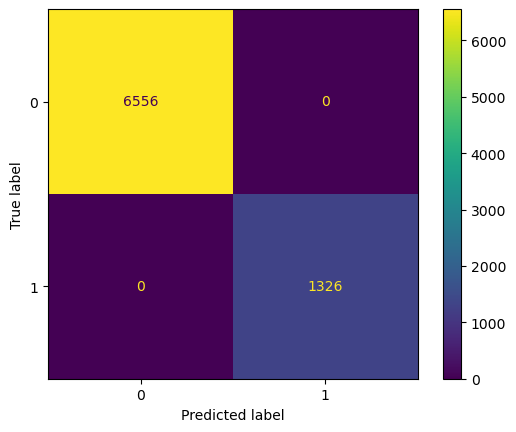

In [109]:
ConfusionMatrixDisplay.from_estimator(RF_model,X_train,y_train)

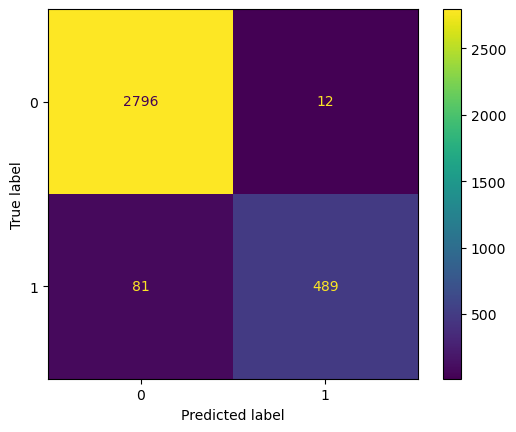

In [110]:
ConfusionMatrixDisplay.from_estimator(RF_model,X_test,y_test)

In [111]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [112]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2808
           1       0.98      0.86      0.91       570

    accuracy                           0.97      3378
   macro avg       0.97      0.93      0.95      3378
weighted avg       0.97      0.97      0.97      3378



## Gradient Boosting

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
GB_model = GradientBoostingClassifier(random_state=1)

In [115]:
GB_model = GB_model.fit(X_train, y_train)

In [116]:
ytrain_predict = GB_model.predict(X_train)
ytest_predict = GB_model.predict(X_test)

In [117]:
# AUC ROC for training data

AUC: 0.949


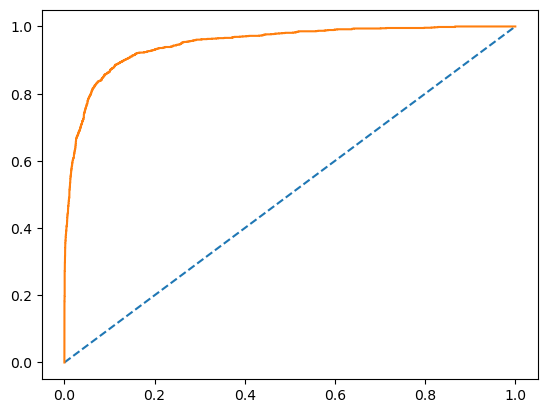

In [118]:
probs = GB_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [119]:
# AUC ROC for test data

AUC: 0.928


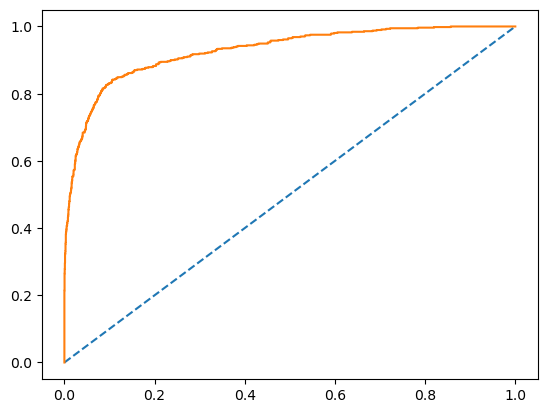

In [120]:
probs = GB_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

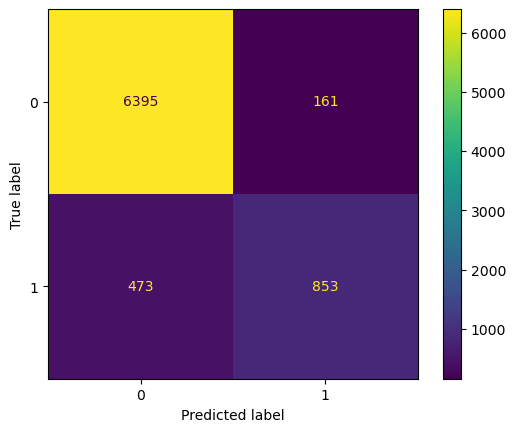

In [121]:
ConfusionMatrixDisplay.from_estimator(GB_model,X_train,y_train)

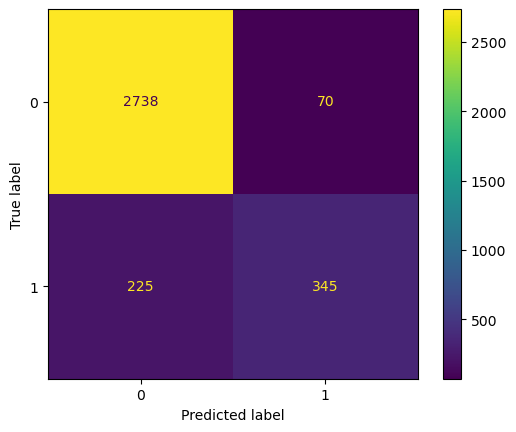

In [122]:
ConfusionMatrixDisplay.from_estimator(GB_model,X_test,y_test)

In [123]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6556
           1       0.84      0.64      0.73      1326

    accuracy                           0.92      7882
   macro avg       0.89      0.81      0.84      7882
weighted avg       0.92      0.92      0.92      7882



In [124]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2808
           1       0.83      0.61      0.70       570

    accuracy                           0.91      3378
   macro avg       0.88      0.79      0.82      3378
weighted avg       0.91      0.91      0.91      3378



## Model Tuning

In [125]:
#RFE

In [126]:
from sklearn.feature_selection import RFE

## Logression Regression Tuned

In [127]:
LR_model = LogisticRegression(penalty='l2',solver= 'newton-cholesky' )
selector = RFE(estimator = LR_model, n_features_to_select=16, step=1)

In [128]:
selector = selector.fit(X_train, y_train)

In [129]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [130]:
LR = pd.DataFrame({'Feature': X.columns, 'Rank': selector.ranking_})
LR[LR['Rank'] == 1]

,Feature,Rank
0,Tenure,1
1,City_Tier,1
2,CC_Contacted_LY,1
3,Payment,1
4,Gender,1
5,Service_Score,1
6,Account_user_count,1
7,Account_segment,1
8,CC_Agent_Score,1
9,Marital_Status,1


In [131]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [132]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6556
           1       0.76      0.40      0.52      1326

    accuracy                           0.88      7882
   macro avg       0.83      0.69      0.73      7882
weighted avg       0.87      0.88      0.86      7882



In [133]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2808
           1       0.77      0.40      0.52       570

    accuracy                           0.88      3378
   macro avg       0.83      0.69      0.73      3378
weighted avg       0.87      0.88      0.86      3378



## Decision Tree Tuned

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2',15, 14, 13, 12,11,10],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
              'criterion' :['gini', 'entropy']
             }

In [136]:
DT_model= DecisionTreeClassifier(random_state=1)

In [137]:
grid_search = GridSearchCV(estimator=DT_model, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5400 candidates, totalling 27000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', 15, 14, 13,
                                          12, 11, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=True)

In [138]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       max_features=15, min_samples_leaf=3, random_state=1)

In [139]:
# Tuned_DT_model = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=15,
#                        max_features=13, random_state=1)

In [140]:
Tuned_DT_model= DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       max_features=15, min_samples_leaf=3, random_state=1)

In [141]:
Tuned_DT_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       max_features=15, min_samples_leaf=3, random_state=1)

In [142]:
pred_train = Tuned_DT_model.predict(X_train)
pred_test = Tuned_DT_model.predict(X_test)

In [143]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6556
           1       0.82      0.78      0.80      1326

    accuracy                           0.93      7882
   macro avg       0.89      0.87      0.88      7882
weighted avg       0.93      0.93      0.93      7882



In [144]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2808
           1       0.77      0.71      0.74       570

    accuracy                           0.92      3378
   macro avg       0.86      0.83      0.85      3378
weighted avg       0.91      0.92      0.91      3378



In [145]:
# AUC ROC for training data

AUC: 0.968


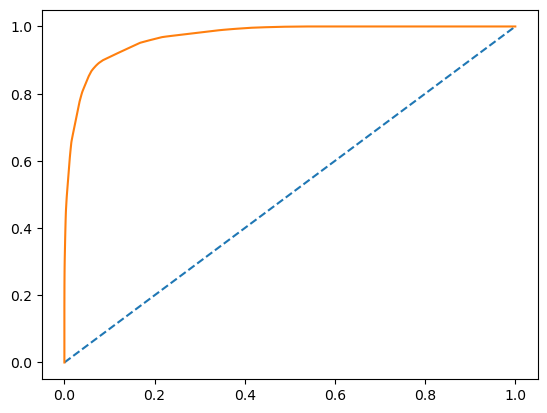

In [146]:
probs = Tuned_DT_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [147]:
# AUC ROC for test data

AUC: 0.929


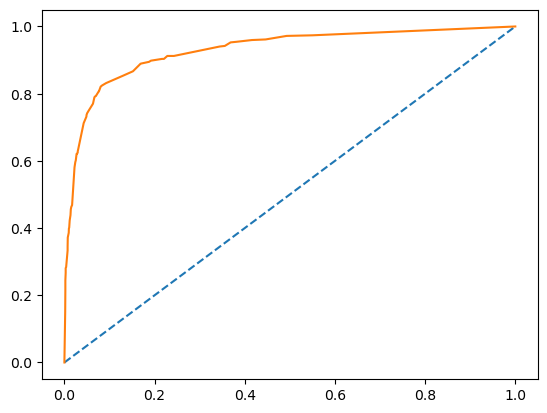

In [148]:
probs = Tuned_DT_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

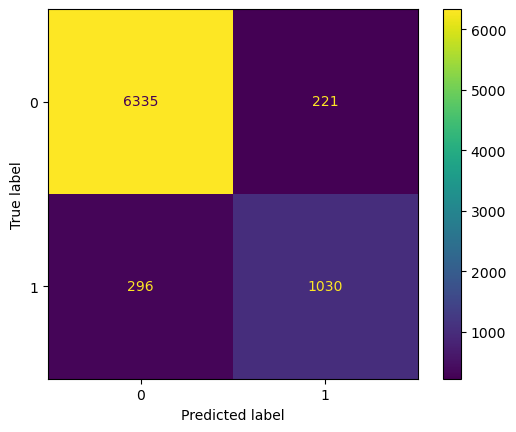

In [149]:
ConfusionMatrixDisplay.from_estimator(Tuned_DT_model,X_train,y_train)

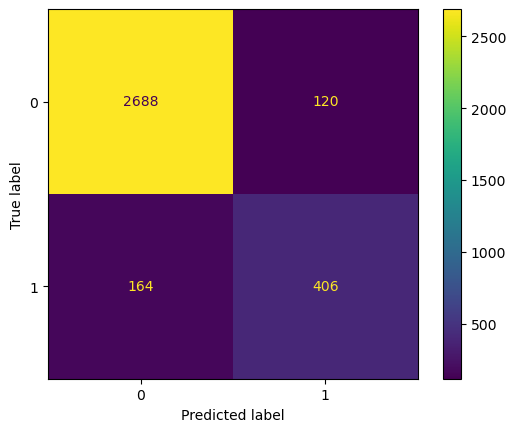

In [150]:
ConfusionMatrixDisplay.from_estimator(Tuned_DT_model,X_test,y_test)

## Random Forest Tuned

In [151]:
param_grid = {'n_estimators' : [100,200],
              'max_features': [8,9,10,11,12],
              'max_depth' : [7,8,9,10],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[6,7,8,9,10]
             }

In [152]:
Tuned_RF_model=RandomForestClassifier(random_state=1)

In [153]:
grid_search = GridSearchCV(estimator=Tuned_RF_model, param_grid=param_grid, cv=3, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


KeyboardInterrupt: 

In [154]:
grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [155]:
Tuned_RF_model= RandomForestClassifier(max_depth=10, max_features=11, min_samples_split=6, class_weight={0: 1, 1: 5} , random_state=1)

In [156]:
Tuned_RF_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=10, max_features=11,
                       min_samples_split=6, random_state=1)

In [157]:
pred_train = Tuned_RF_model.predict(X_train)
pred_test = Tuned_RF_model.predict(X_test)

In [158]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6556
           1       0.85      0.97      0.91      1326

    accuracy                           0.97      7882
   macro avg       0.92      0.97      0.94      7882
weighted avg       0.97      0.97      0.97      7882



In [159]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2808
           1       0.80      0.87      0.83       570

    accuracy                           0.94      3378
   macro avg       0.89      0.91      0.90      3378
weighted avg       0.94      0.94      0.94      3378



In [160]:
# AUC ROC for training data

AUC: 0.995


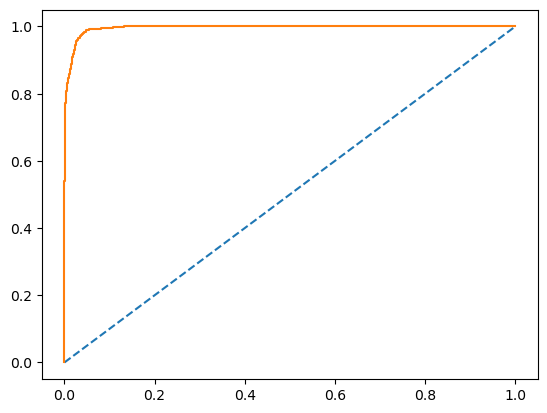

In [161]:
probs = Tuned_RF_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [162]:
# AUC ROC for test data

AUC: 0.978


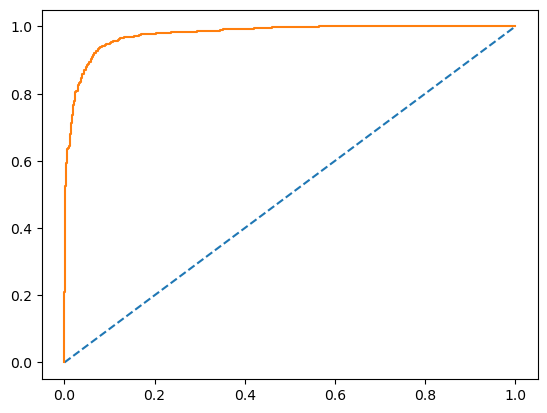

In [163]:
probs = Tuned_RF_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

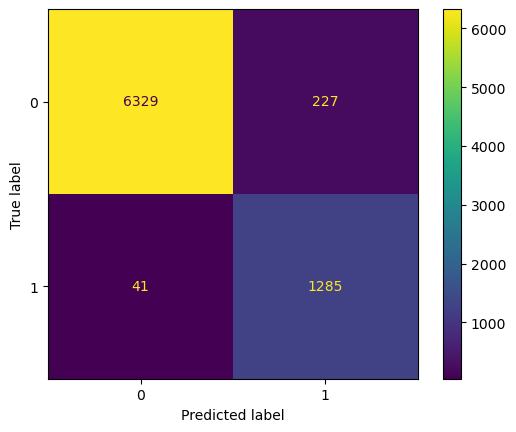

In [164]:
ConfusionMatrixDisplay.from_estimator(Tuned_RF_model,X_train,y_train)

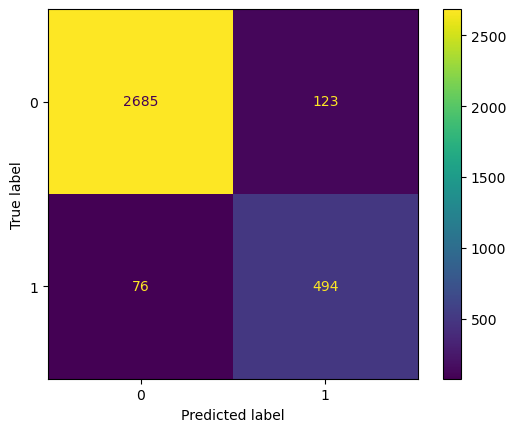

In [165]:
ConfusionMatrixDisplay.from_estimator(Tuned_RF_model,X_test,y_test)

In [166]:
import pickle

In [167]:
pickle_out = open("Randomforest.pkl", "wb")
pickle.dump(Tuned_RF_model, pickle_out)
loaded_model = pickle.load(open("Randomforest.pkl","rb"))
result= loaded_model.score(X_test, y_test)
print(result)

0.9410894020130255
